<a href="https://colab.research.google.com/github/agustinLapi/MachineLearning/blob/main/Beer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tendencias en las preferencias de cerveza
####Este conjunto de datos contiene alrededor de 1,5 millones de reseñas de cervezas de BeerAdvocates. Su objetivo es caracterizar el conjunto de datos, agrupar cervezas similares y poder recomendar una cerveza, que preguntas podría responder utilizando los datos, por ejemplo: si tuviera que elegir 5 cervezas para recomendar, ¿cuál elegiría? ¿Por qué? ¿Cuáles de los factores (sabor, aroma, apariencia, paladar) son más importantes para determinar la la calidad general de una cerveza? Si por lo general disfruto de las IPA, ¿qué cerveza debo probar?

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

beer_reviews_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
beer_reviews_1.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,871901.000000,8.719010e+05,871901.000000,871901.000000,871901.000000,871901.000000,871901.000000,835659.000000,871901.000000
mean,3271.796264,1.227348e+09,3.828825,3.755972,3.856491,3.757737,3.808603,7.046130,23337.928449
std,5644.054301,7.531277e+07,0.704718,0.677216,0.597753,0.662392,0.711305,2.330143,22030.109041
min,1.000000,8.406720e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,140.000000,1.179688e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,2151.000000
50%,590.000000,1.243041e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,17770.000000
75%,2743.000000,1.289962e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,41722.000000
max,28003.000000,1.326285e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [51]:
beer_reviews_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_2.csv")
beer_reviews_2.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,714713.000000,7.147130e+05,714713.000000,714713.000000,714713.000000,714713.000000,714713.000000,683170.000000,714713.000000
mean,2957.238473,1.220114e+09,3.799424,3.710828,3.823527,3.726578,3.773655,7.037808,19730.241690
std,5491.633209,7.783588e+07,0.739240,0.720948,0.637284,0.705274,0.755971,2.313168,21390.648054
min,4.000000,8.853408e+08,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,10.000000
25%,147.000000,1.166726e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.200000,1381.000000
50%,367.000000,1.234357e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,8984.000000
75%,1941.000000,1.286605e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,36087.000000
max,27984.000000,1.326275e+09,5.000000,5.000000,5.000000,5.000000,5.000000,39.000000,77317.000000


In [52]:
beer_reviews_1.head

<bound method NDFrame.head of         brewery_id             brewery_name  ...  beer_abv  beer_beerid
0            10325          Vecchio Birraio  ...      5.00        47986
1            10325          Vecchio Birraio  ...      6.20        48213
2            10325          Vecchio Birraio  ...      6.50        48215
3            10325          Vecchio Birraio  ...      5.00        47969
4             1075  Caldera Brewing Company  ...      7.70        64883
...            ...                      ...  ...       ...          ...
871896         147        Stone Brewing Co.  ...     11.10        56068
871897         147        Stone Brewing Co.  ...     11.10        56068
871898         147        Stone Brewing Co.  ...     11.10        56068
871899         147        Stone Brewing Co.  ...      9.91         3678
871900         147        Stone Brewing Co.  ...     11.10        56068

[871901 rows x 13 columns]>

In [53]:
beer_reviews_1.shape

(871901, 13)

In [54]:
beer_reviews_1.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [55]:
beer_reviews_2.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [56]:
reviews =pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)

In [57]:
reviews.shape

(1586614, 13)

###El dataframe reviews posee casi 1.6 millones de reseñas de BeerAdvocates

In [58]:
print('Information about the columns; type,entries,missing value info:  \n')
print(reviews.info())

Information about the columns; type,entries,missing value info:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1

#### Se puede ver que falta una gran cantidad de datos de la categoría beer_abv (graduación de alcohol) 

In [59]:
# Se puede ver que falta una gran cantidad de datos de la categoría beer_abv (graduación de alcohol) 
print("Missing values in Dataset: /n", reviews.isnull().sum())

Missing values in Dataset: /n brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [60]:
#Tiramos los datos vacios del dataset
reviews = reviews.dropna(axis = 0)
print("After removing the missing entries in dataset: /n", reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB
After removing the missing entries in dataset: /n None


In [61]:
print('User reviewed one beer more than ones,categorised by beer name: \n', 
      reviews.loc[reviews.duplicated(['review_profilename','beer_name'],keep= False)])

User reviewed one beer more than ones,categorised by beer name: 
          brewery_id                 brewery_name  ...  beer_abv  beer_beerid
187            1075      Caldera Brewing Company  ...       5.5        25414
199            1075      Caldera Brewing Company  ...       5.5        25414
389            1075      Caldera Brewing Company  ...       6.1        10784
426            1075      Caldera Brewing Company  ...       6.1        10784
804            1075      Caldera Brewing Company  ...       5.4        10785
...             ...                          ...  ...       ...          ...
1586560       14359  The Defiant Brewing Company  ...       6.2        35185
1586563       14359  The Defiant Brewing Company  ...       6.2        35185
1586564       14359  The Defiant Brewing Company  ...       6.2        35185
1586580       14359  The Defiant Brewing Company  ...       5.5        36388
1586581       14359  The Defiant Brewing Company  ...       5.5        36388

[41425 ro

In [62]:
print('User reviewed one beer more than ones,categorised by beer ids: \n',
      reviews.loc[reviews.duplicated(['review_profilename','beer_beerid'],keep=False)])

User reviewed one beer more than ones,categorised by beer ids: 
          brewery_id                 brewery_name  ...  beer_abv  beer_beerid
187            1075      Caldera Brewing Company  ...      5.50        25414
199            1075      Caldera Brewing Company  ...      5.50        25414
389            1075      Caldera Brewing Company  ...      6.10        10784
426            1075      Caldera Brewing Company  ...      6.10        10784
804            1075      Caldera Brewing Company  ...      5.40        10785
...             ...                          ...  ...       ...          ...
1585815        3835          Drake's Brewing Co.  ...      8.75        12172
1586013        3835          Drake's Brewing Co.  ...      5.20        25095
1586027        3835          Drake's Brewing Co.  ...      5.20        25095
1586580       14359  The Defiant Brewing Company  ...      5.50        36388
1586581       14359  The Defiant Brewing Company  ...      5.50        36388

[28379 row

In [63]:
## Sorting the ratings with descending order,so that with removing duplicates for beer reviews,user gave highest ratings entry can be kept
#reviews = reviews.sort_values('review_overall',ascending= False)

###No voy a ordenar las reviews, porque sino me quedo con las primeras 100mil cuyas reviews overall son entre 4.5 y 5. En vez de eso me quiero quedar con una muestra que se adecue mejor a los datos. Es decir, los primeros 100K sin ordenar. También podría tomar los primeros 10k cada 100k y así tener una segmentación aún más aleatoria.

In [64]:
## Removing the duplicates
reviews = reviews.drop_duplicates(subset=['review_profilename','beer_name'],keep = 'first')
reviews = reviews.drop_duplicates(subset=['review_profilename','beer_beerid'],keep = 'first')
reviews.shape

(1496263, 13)

In [16]:
round(reviews.describe())

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496263.0,1.496263e+06,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0
mean,3068.0,1.225593e+09,4.0,4.0,4.0,4.0,4.0,7.0,21434.0
std,5541.0,7.572180e+07,1.0,1.0,1.0,1.0,1.0,2.0,21798.0
min,1.0,8.843904e+08,0.0,1.0,0.0,1.0,1.0,0.0,5.0
25%,141.0,1.175915e+09,4.0,4.0,4.0,4.0,4.0,5.0,1655.0
50%,414.0,1.240608e+09,4.0,4.0,4.0,4.0,4.0,6.0,12895.0
75%,2250.0,1.289257e+09,4.0,4.0,4.0,4.0,4.0,8.0,39273.0
max,28003.0,1.326285e+09,5.0,5.0,5.0,5.0,5.0,58.0,77316.0


In [65]:
reviews.review_time = pd.to_datetime(reviews.review_time,unit = 's')
reviews.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f391f2ea450>,
      dtype=object)

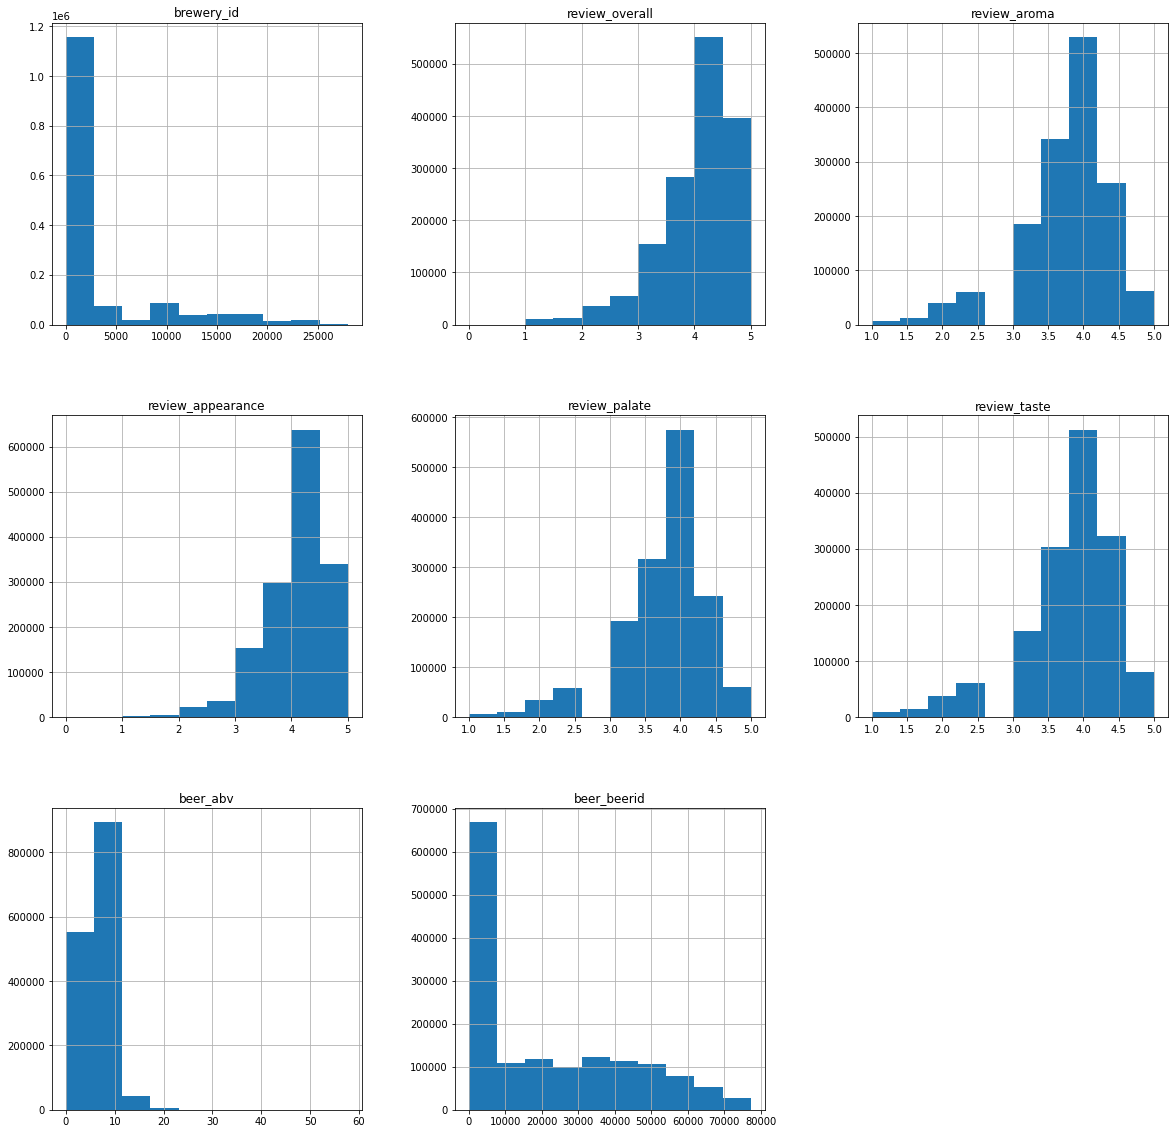

In [18]:
reviews.hist(figsize = (20,20))

####Recordemos las columnas del dataset
##brewery_id, brewery_name, review_time, review_overall, review_aroma, review_appearance, review_profilename, beer_style, review_palate, review_taste, beer_name, beer_abv, beer_beerid

In [19]:
import seaborn as sb
#me quedo con los primeros 100k datos
col_names = [ 'review_aroma', 'review_appearance','review_palate', 'review_taste']
rev= reviews.iloc[0:100000, :]
#sb.pairplot(rev2.dropna(), hue='beer_style',size=4, vars= col_names,kind='scatter')
#y = rev.loc[:, 'beer_style']
y = rev.loc[:, 'review_overall']
X = rev.loc[:, col_names]
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

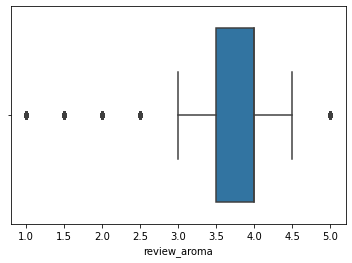

In [20]:
rev.describe()
import seaborn as sns
sns.boxplot(x=reviews['review_aroma'])

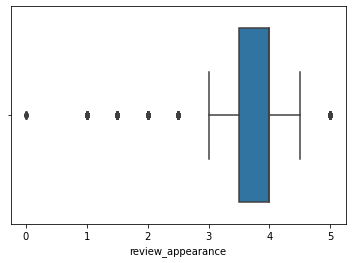

In [21]:
sns.boxplot(x=reviews['review_appearance'])

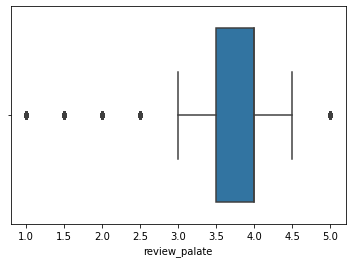

In [22]:
sns.boxplot(x=reviews['review_palate'])

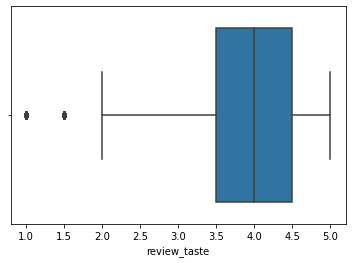

In [23]:
sns.boxplot(x=reviews['review_taste'])

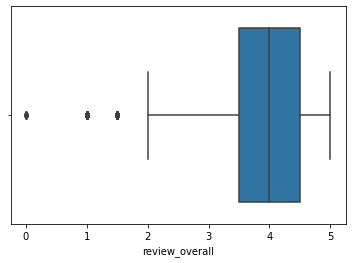

In [24]:
sns.boxplot(x=reviews['review_overall'])

####De este análisis de los datos vemos que el parámetro más abarcativo a la hora de tomar una cerveza es el del sabor donde los outliers parecen achicarse y a su vez crece el intervalo donde se concentra la distribución de los datos. Por otro lado de los histogramas, si bien taste, aroma y palate son parecidos, hay un parecido  muy alto entre taste y aroma. Se podría pensar en eliminar la columna aroma y solo dejar taste de estas dos para realizar el clustering. 
###Por otro lado, pareciera ser que el review overall estuviese un poco 'inflado', dado que la mayor concentración de reseñas se encuentra entre 3.5 y 4.5 dado que 3 de los 4 parámetros que se evalúan la mayor cantidad de puntajes se distribuyen entre 3.5 a 4, y solo para el sabor se distribuyen de 3.5 a 4.5
###Esto confirma nuestra hipótesis de que el parámetro que tiene más peso sobre la cerveza es el taste (sabor) de la misma. Lo cual tiene mucho sentido porque a fin de cuentas es una bebida-

In [25]:
y

0        1.5
1        3.0
2        3.0
3        3.0
4        4.0
        ... 
99995    4.0
99996    2.5
99997    4.0
99998    3.5
99999    4.5
Name: review_overall, Length: 100000, dtype: float64

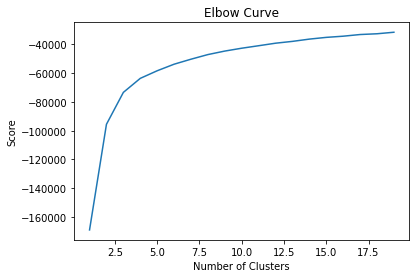

In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn import preprocessing

from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.29755722 2.77611079 2.37613003 2.16455088]
 [3.76206099 3.98015382 3.83433281 3.85048136]
 [4.27002303 3.95472054 4.10952481 4.3589282 ]
 [4.43742754 4.57026054 4.53725059 4.56150467]
 [3.23755839 3.43411568 3.22691886 3.23776022]]


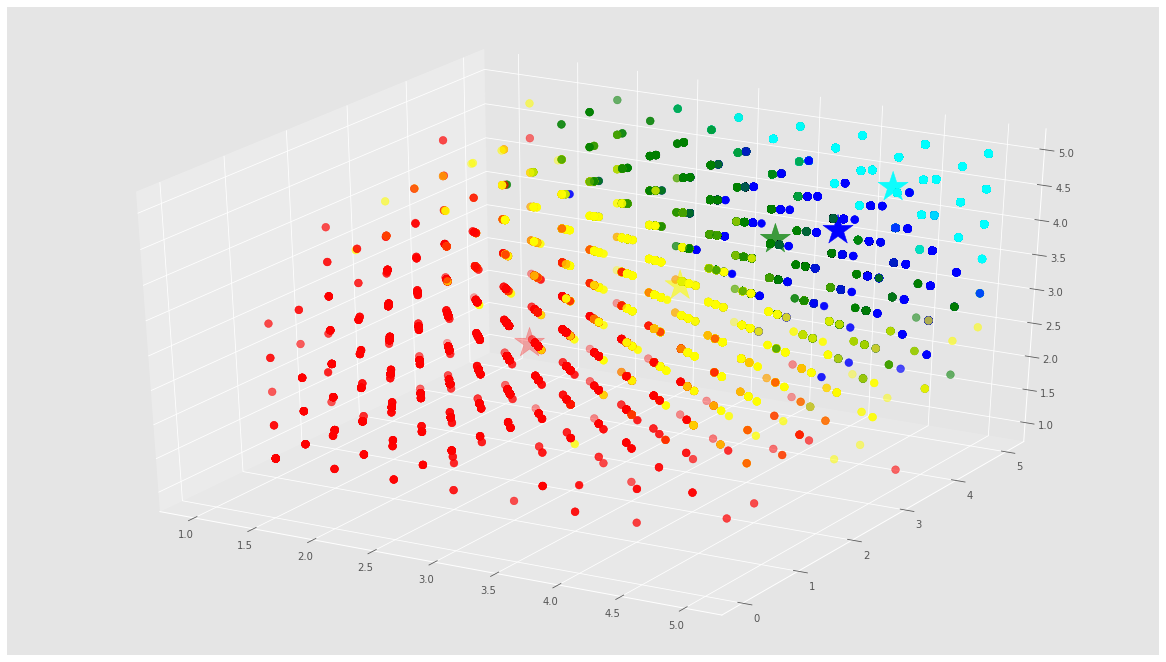

In [28]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','yellow', 'magenta', 'black','gray']
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

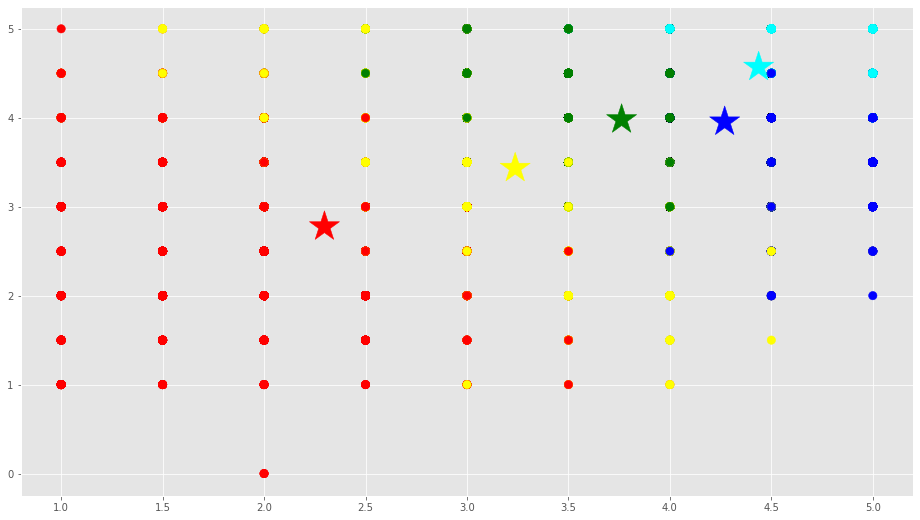

In [29]:
# Getting the values and plotting it
f1 = rev['review_taste'].values
f2 = rev['review_appearance'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

###review_aroma	review_appearance	review_palate	review_taste

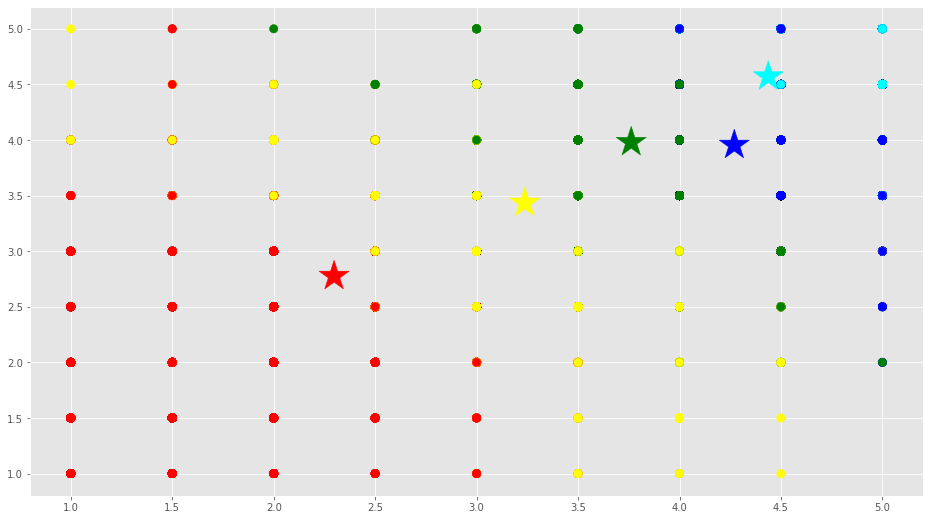

In [30]:
# Getting the values and plotting it
f1 = rev['review_taste'].values
f2 = rev['review_palate'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

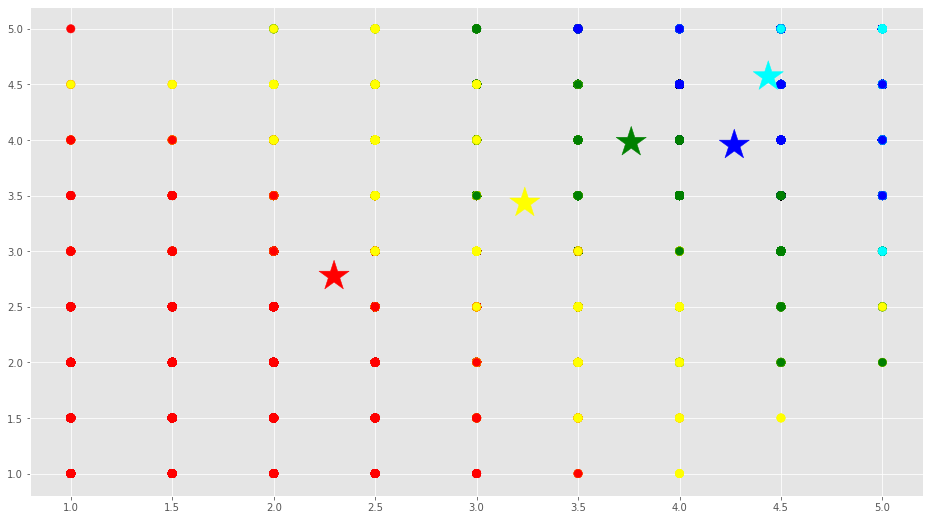

In [31]:
# Getting the values and plotting it
f1 = rev['review_taste'].values
f2 = rev['review_aroma'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

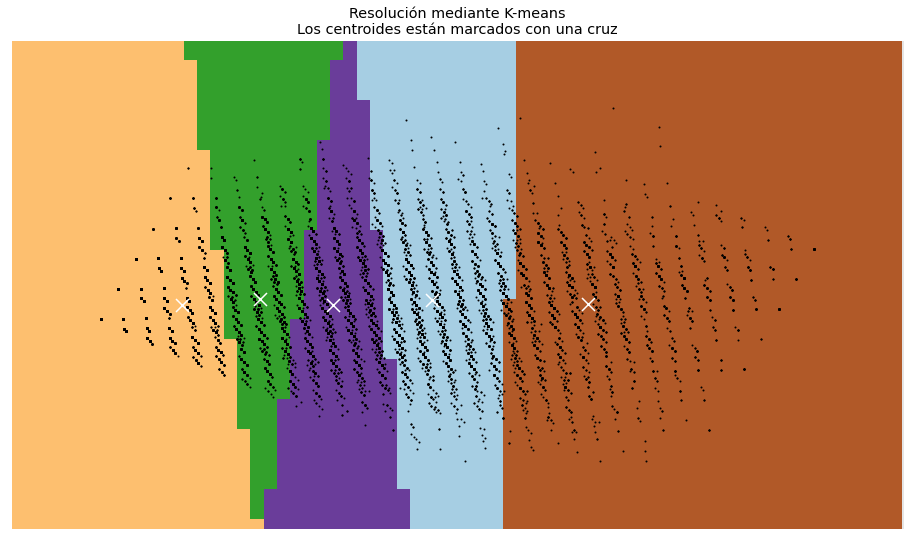

In [32]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Tamaño de paso de la malla. Disminuir para aumentar la calidad.
h = .15     # Punto en la malla [x_min, x_max]x[y_min, y_max].

# Ploteo el límite de decisión de cada agrupamiento
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Coloco el resultado en una gráfica de color
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Resolución mediante K-means\n'
          'Los centroides están marcados con una cruz')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [33]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
print(homogeneity_score(y, labels))
print(fowlkes_mallows_score(y, labels))
print(davies_bouldin_score(X, labels))
print(calinski_harabasz_score(X, labels))

0.2133132649994389
0.35743625449170646
1.4323306329100436
46624.79955048061


##Resultado obtenido con los datos ordenados, es decir reviews overall entre 4.5 y 5

####Con k=8 obtenemos un fowlkes score de 0.47, y con 5 de 0.455, no me parece una diferencia significativa para utilzar 8 clusters


In [34]:
#Voy a convertir el label de beer_stlyle a numerico
my_list = rev.loc[:, 'beer_style']
print(my_list.iloc[1])

English Strong Ale


In [35]:
def bStyle2int(styles):
  numbers = [1]
  index = []
  for i in range(len(styles)):
    if styles.iloc[i] not in index :
      index.append(styles.iloc[i])
      numbers.append(numbers[-1]+1)
   


  return numbers, index

def replace(data, number, index, col):
  result = []
  #Se que es lo menos eficiente del mundo, but still
  for i in range(len(data)):
    for j in range(len(index)):
      if data.iloc[i] ==  index[j]:
        result.append(number[j])
        break
  #print(result)
  my_data = pd.DataFrame(result, columns = [col])

  return my_data

index, names = bStyle2int(my_list)
print(names)
print(index)

['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout', 'German Pilsener', 'American Double / Imperial IPA', 'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout', 'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'American IPA', 'Russian Imperial Stout', 'American Amber / Red Ale', 'American Strong Ale', 'Märzen / Oktoberfest', 'American Adjunct Lager', 'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale', 'Fruit / Vegetable Beer', 'Belgian Pale Ale', 'English Bitter', 'English Porter', 'Irish Dry Stout', 'American Barleywine', 'American Double / Imperial Stout', 'Doppelbock', 'American Stout', 'Maibock / Helles Bock', 'Dortmunder / Export Lager', 'Euro Strong Lager', 'Low Alcohol Beer', 'Extra Special / Strong Bitter (ESB)', 'Bock', 'English India Pale Ale (IPA)', 'Altbier', 'Kölsch', 'Pumpkin Ale', 'Rye Beer', 'American Pale Wheat Ale', 'Milk / Sweet Stout', 'Schwarzbier', 'Munich Dunkel Lager', 'Vienna Lage

In [36]:
print(len(index))

102


In [37]:
beer_style= replace(my_list, index, names, 'Beer_Style')
beer_style.head()

,Beer_Style
0,1
1,2
2,3
3,4
4,5


###Voy a agregar la columna de beerstyles numericos a mi X


In [38]:
beer_style.head

<bound method NDFrame.head of        Beer_Style
0               1
1               2
2               3
3               4
4               5
...           ...
99995          29
99996          29
99997          29
99998          29
99999          29

[100000 rows x 1 columns]>

In [39]:
X.reset_index(drop=True, inplace=True)
beer_style.reset_index(drop=True, inplace=True)
X['beer_style'] = beer_style
#X = pd.concat((X, beer_style), axis=1, ignore_index=True)

In [40]:
X.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_style
0,2.0,2.5,1.5,1.5,1
1,2.5,3.0,3.0,3.0,2
2,2.5,3.0,3.0,3.0,3
3,3.0,3.5,2.5,3.0,4
4,4.5,4.0,4.0,4.5,5


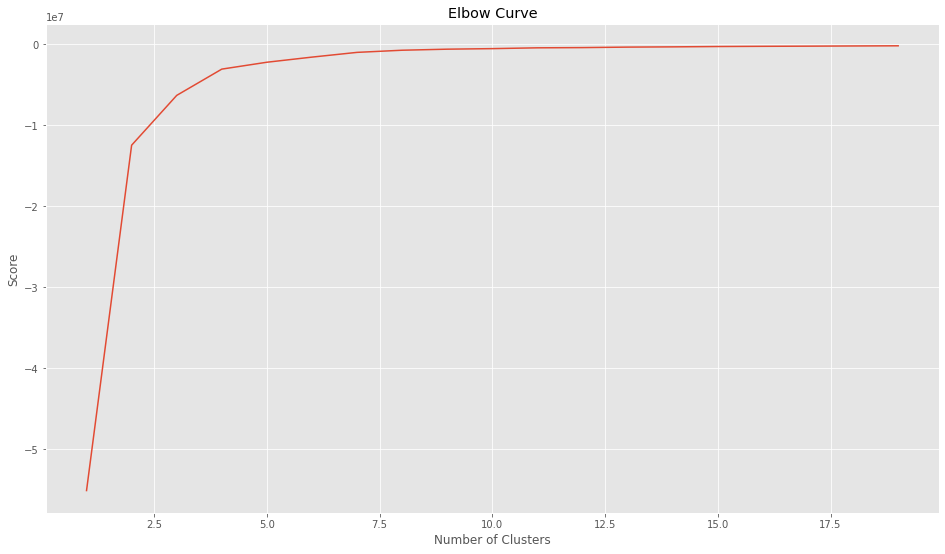

In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.63998712  3.78448165  3.67746297  3.71661301 40.37527366]
 [ 3.86773093  3.96203706  3.86935709  3.93252559 11.45468496]
 [ 3.77369459  3.80514897  3.81900758  3.86624105 80.75272501]
 [ 3.87210256  3.94645401  3.88082186  3.9442526  27.23744982]
 [ 3.77250539  3.86046659  3.75434259  3.82131989 57.78901991]]


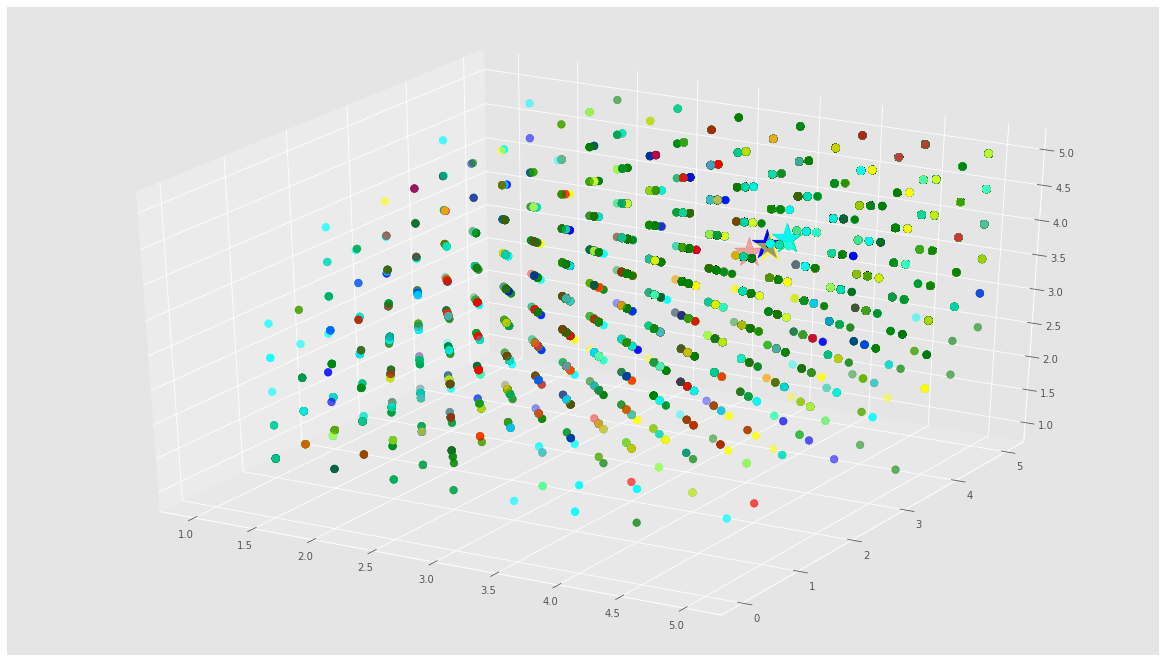

In [43]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','yellow', 'magenta', 'black','gray']
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [44]:
print(homogeneity_score(y, labels))
print(fowlkes_mallows_score(y, labels))
print(davies_bouldin_score(X, labels))
print(calinski_harabasz_score(X, labels))

0.0053393352408128685
0.26980820889492796
0.479882298488846
583188.1530395623


In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
meanshift = MeanShift()
meanshift.fit(X)

labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: ' + str(n_clusters_))

Estimated number of clusters: 3


Text(0, 0.5, 'Feature 2')

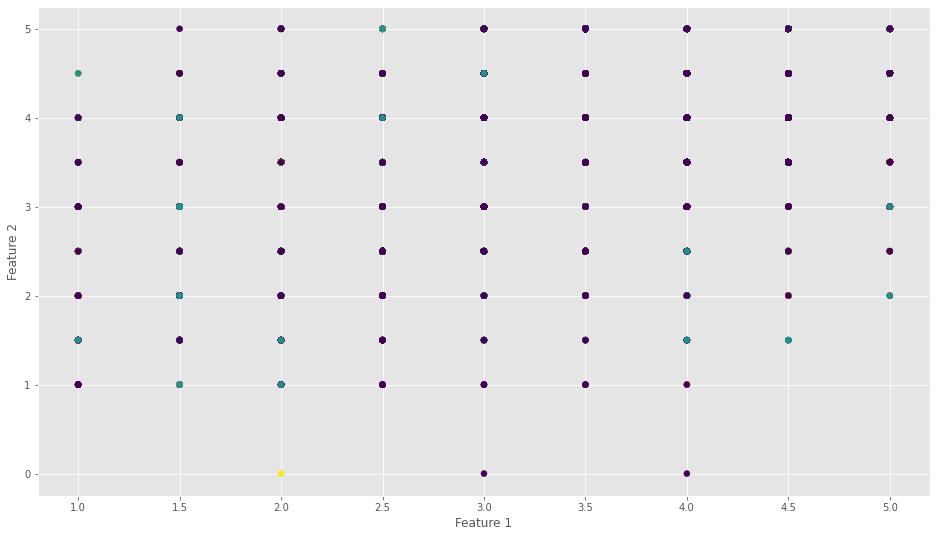

In [46]:
y_pred  = meanshift.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

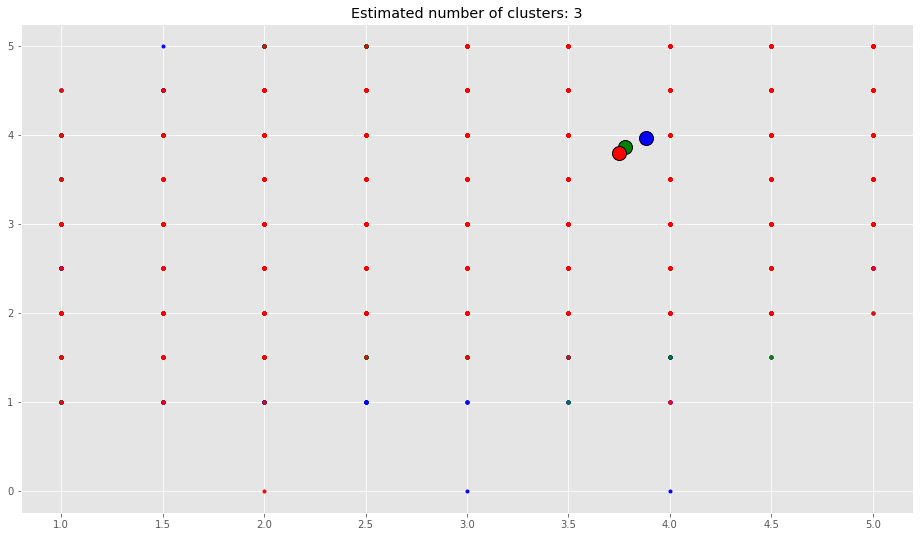

In [47]:
from itertools import cycle
cluster_centers = meanshift.cluster_centers_
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X.iloc[my_members, 0], X.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

###I'll drop the aroma review and instead use the beer abv column. I think it is better treat the data this way to agrupate according to the beer style


In [66]:
#me quedo con los primeros 100k datos
col_names = [ 'beer_abv', 'review_appearance','review_palate', 'review_taste']
rev= reviews.iloc[0:100000, :]
#y = rev.loc[:, 'beer_style']
my_list = rev.loc[:, 'beer_style']
X = rev.loc[:, col_names]
my_list.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

index, names = bStyle2int(my_list)
y = replace(my_list, index, names, 'Beer_Style')

In [67]:
X.head()

,beer_abv,review_appearance,review_palate,review_taste
0,5.0,2.5,1.5,1.5
1,6.2,3.0,3.0,3.0
2,6.5,3.0,3.0,3.0
3,5.0,3.5,2.5,3.0
4,7.7,4.0,4.0,4.5


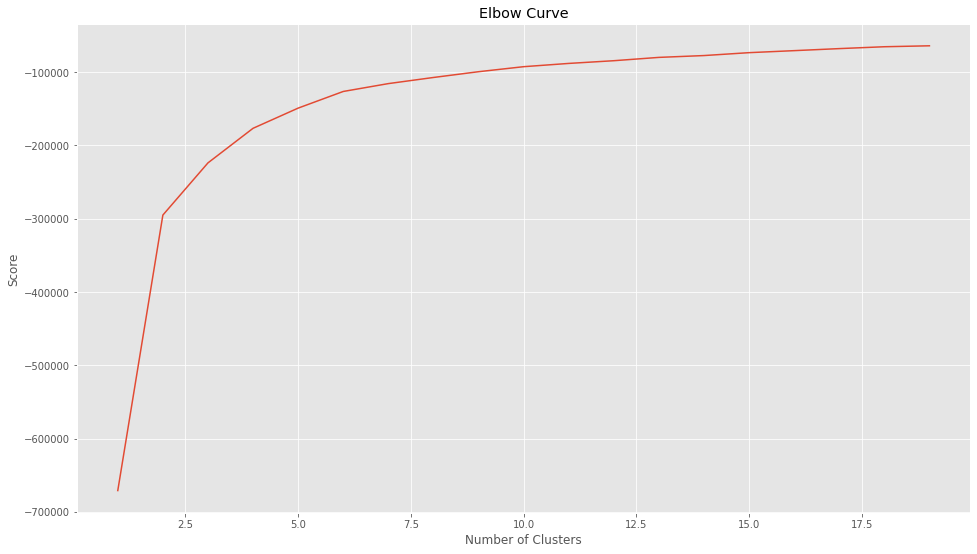

In [68]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 8.83926233  4.1699635   4.19101024  4.27928883]
 [ 6.80401493  4.06269998  3.97207832  4.05435776]
 [10.90477278  4.12807566  4.17379979  4.26536828]
 [ 5.04343262  3.09508656  2.81695519  2.76794807]
 [ 5.22553781  3.9437185   3.89683986  3.96287321]
 [16.51764988  4.02358114  4.12989608  4.27218225]
 [ 8.96349634  3.50641026  3.11556777  3.10412088]]


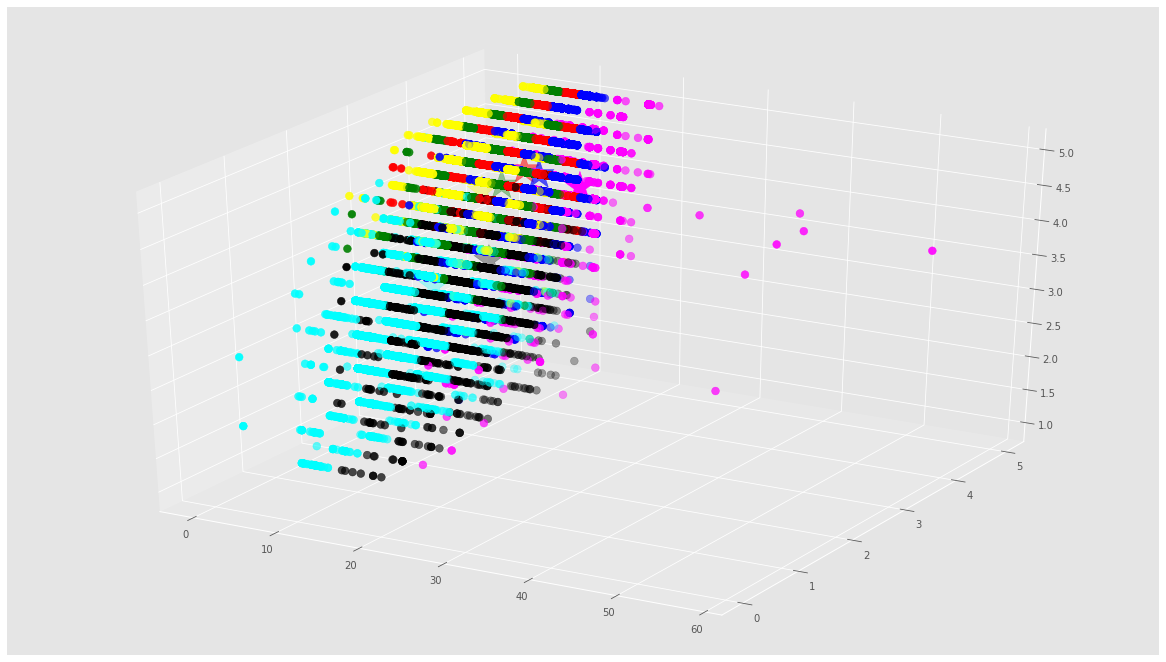

In [72]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','yellow', 'magenta', 'black','gray']
colores=['red','green','blue','cyan','yellow', 'magenta', 'black']
#colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

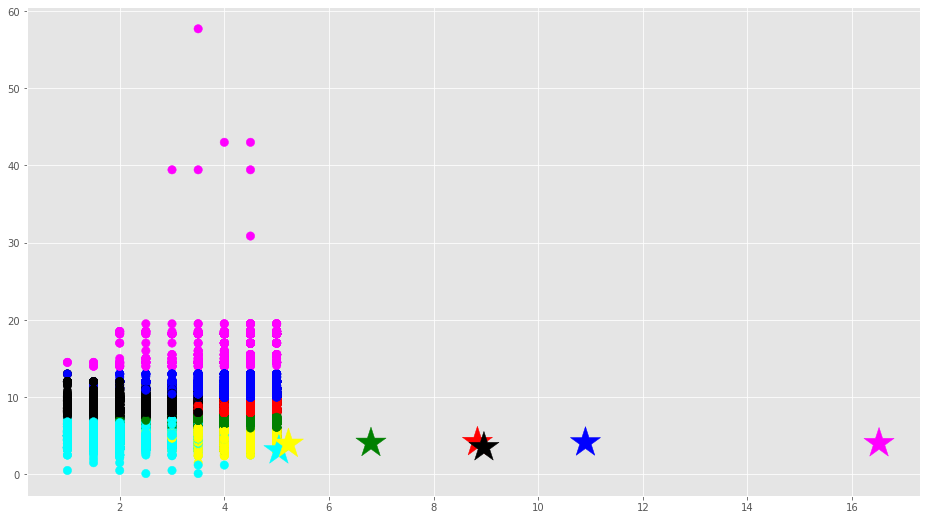

In [73]:
# Getting the values and plotting it
f1 = rev['review_taste'].values
f2 = rev['beer_abv'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

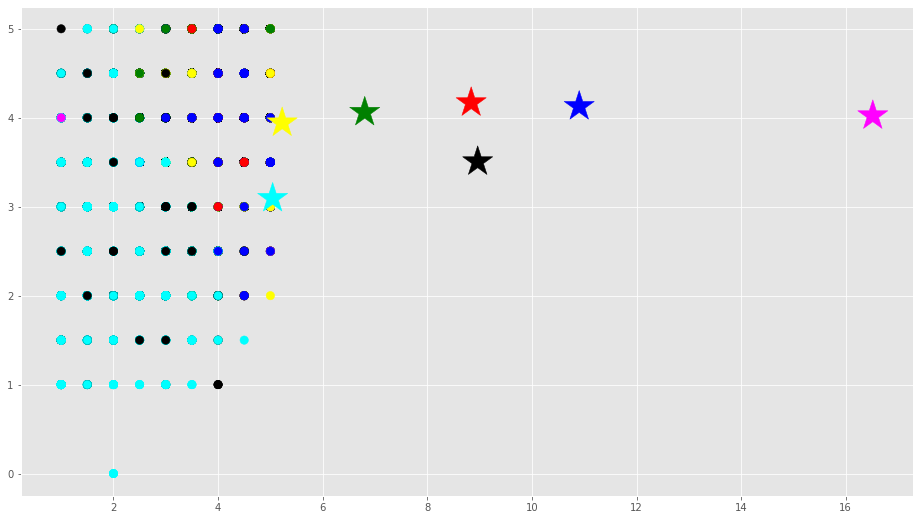

In [75]:
f1 = rev['review_taste'].values
f2 = rev['review_appearance'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

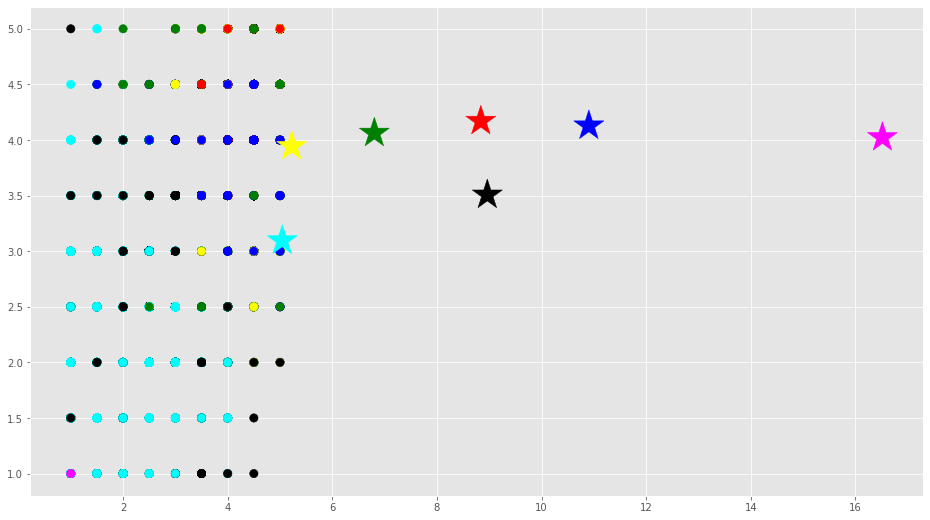

In [76]:
f1 = rev['review_taste'].values
f2 = rev['review_palate'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [96]:
y_2 = y.to_numpy(copy=True)
y_2 = y_2.reshape(labels.shape)
print(homogeneity_score(y_2, labels))
print(fowlkes_mallows_score(y_2, labels))

0.2300372366666498
0.2815452879995907


In [85]:
print(davies_bouldin_score(X, labels))
print(calinski_harabasz_score(X, labels))

1.0460641041661076
79913.90131463771


####Al realizar estas modificaciones se obtiene una mejora en los resultados dado que el método de calinski cuanto más alto es resulta en una mejor puntuación. Se obtuvo entonces un puntaje de 80mil frente a los 46mil obtenido anteriormente. Recordemos que se reemplazo la review de aroma por la cantidad de alcohol de la cerveza, y las labels objetivo son el tipo de cerveza. 

###Para poder observar un mejor trabajo de los clusters y de agrupamiento, me parecería abstraer un poco las clases (o tipos) de cerveza, dado que son arriba de 100, y hacer una clase de mayor nivel que sea por ejemplo: de rubias, negras, rojas, IPAs, ó lager, ipa, stout, apa, etc. Una que resulte representativa. Dado que por ahí diferentes tipos de IPAs pueden agruparse dentro de un solo grupo, etc. 

####Si se pudiera hacer esto creo que se podría obtener un resultado más representativo.